In [29]:
from src.comparison import main
from IPython.display import display
import pandas as pd

result = main()

if result is not None and isinstance(result, pd.DataFrame):
    display(result)
    # result.to_csv('data/result.csv', index=False)
else:
    print("No result to display or save.")

Current Working Directory: /Users/arturogonzalez/DataspellProjects/missing_stock_prices_python


/Users/arturogonzalez/DataspellProjects/missing_stock_prices_python/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/arturogonzalez/DataspellProjects/missing_stock_prices_python/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/arturogonzalez/DataspellProjects/missing_stock_prices_python/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



,ARIMA,Gradient Boosting,Random Forest,Spline,Linear,hackerrank
Timestamp,,,,,,
2012-03-13 16:00:00,32.203880,32.023024,32.220000,32.567407,32.540000,32.69
2012-03-21 16:00:00,32.099659,32.346587,32.386600,32.022415,32.120000,32.15
2012-03-26 16:00:00,32.111893,32.428491,32.563100,32.504813,32.405000,32.61
2012-05-24 16:00:00,29.351512,30.128947,29.495000,29.216148,29.380000,29.30
2012-06-01 16:00:00,29.412019,30.329830,31.182250,29.210982,29.196667,28.96
2012-06-04 16:00:00,29.410482,29.995149,30.660200,28.476075,28.973333,28.78
2012-07-20 16:00:00,30.841651,30.642020,30.656800,30.778367,30.320000,31.05
2012-07-23 16:00:00,30.849671,30.137013,29.790300,29.645653,29.840000,29.58
2012-07-26 16:00:00,29.321996,30.184023,29.660300,29.565652,29.590000,29.50


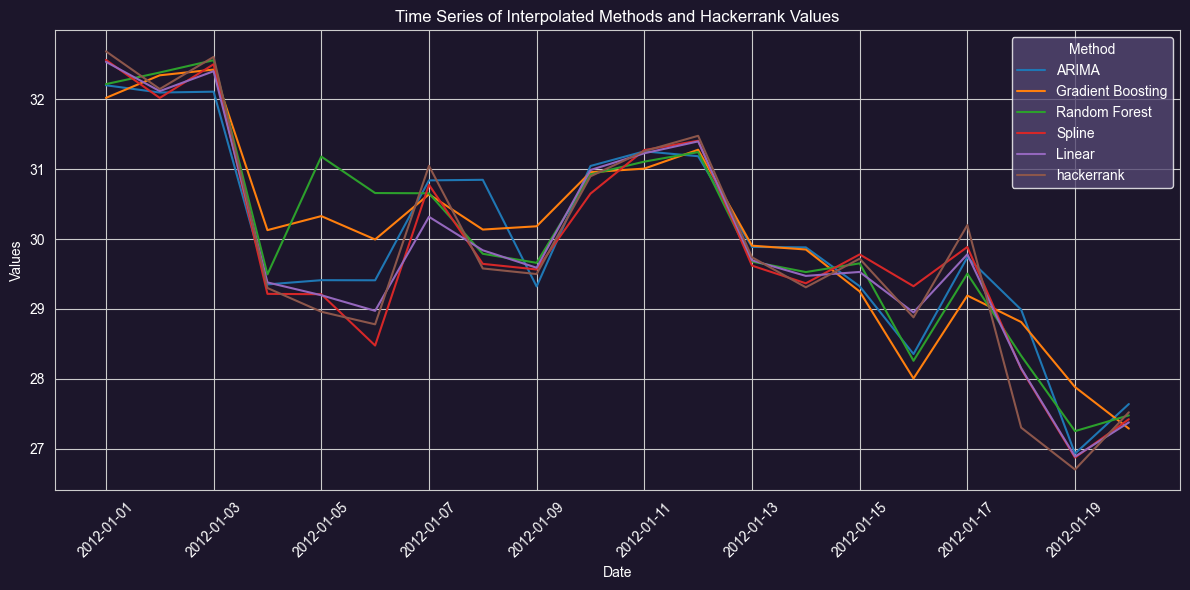

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'result' DataFrame is pre-loaded and contains multiple interpolation methods columns
# Generate a date range based on the number of rows assuming daily data starting from a specific date
date_range = pd.date_range(start='2012-01-01', periods=len(result), freq='D')

# Assign this date range as a new column
result['Date'] = date_range
result.set_index('Date', inplace=True)

# Convert the DataFrame from wide to long format for easier plotting with seaborn
result_long = pd.melt(result.reset_index(), id_vars=['Date'], var_name='Method', value_name='Value')

# Create the scatter plot using Seaborn
plt.figure(figsize=(12, 6))  # Set the figure size for better readability
ax = sns.lineplot(data=result_long, x='Date', y='Value', hue='Method')

plt.title('Time Series of Interpolated Methods and Hackerrank Values', color='white')
plt.xlabel('Date', color='white')
plt.ylabel('Values', color='white')
plt.xticks(rotation=45, color='white')  # Rotate x-axis labels for better readability
plt.yticks(color='white')  # Set y-axis labels to white

# Set the background color to dark purple
ax.set_facecolor('#1C162B')  # Sets the axes background color to dark purple
plt.gcf().set_facecolor('#1C162B')  # Sets the figure background color to dark purple

# Update legend to have white text and adjust background for visibility
legend = plt.legend(title='Method', facecolor='#544872', edgecolor='white')
plt.setp(legend.get_texts(), color='white')  # Set the legend text to white
plt.setp(legend.get_title(), color='white')  # Set the legend title to white

plt.tight_layout()  # Adjust subplots to give some padding
plt.show()


In [45]:
import pandas as pd
import plotly.express as px

# Assuming 'result' is already loaded and available as a DataFrame
# Generate a date range based on the number of rows assuming daily data starting from a specific date
date_range = pd.date_range(start='2012-01-01', periods=len(result), freq='D')

# Assign this date range as a new column; for Plotly we'll keep it as a column for easier handling
result['Date'] = date_range

# Create the Plotly line chart
fig = px.line(result, x='Date', y=result.columns[:-1], title='Time Series of Interpolated Methods and Hackerrank Values',
              labels={'value': 'Values', 'variable': 'Method', 'Date': 'Date'})

# Update layout for better readability
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Interpolated/Predicted Values',
    legend_title='Method',
    xaxis=dict(
        tickangle=-45,
        nticks=20,
        tickformat='%Y-%m-%d'
    ),
    plot_bgcolor='#1C162B',  # Dark purple background for the plotting area
    paper_bgcolor='#1C162B',  # Dark purple background for the entire chart area
    font=dict(  # Change font color to white for better visibility against the dark background
        color="white"
    )
)

# Show the plot
fig.show()


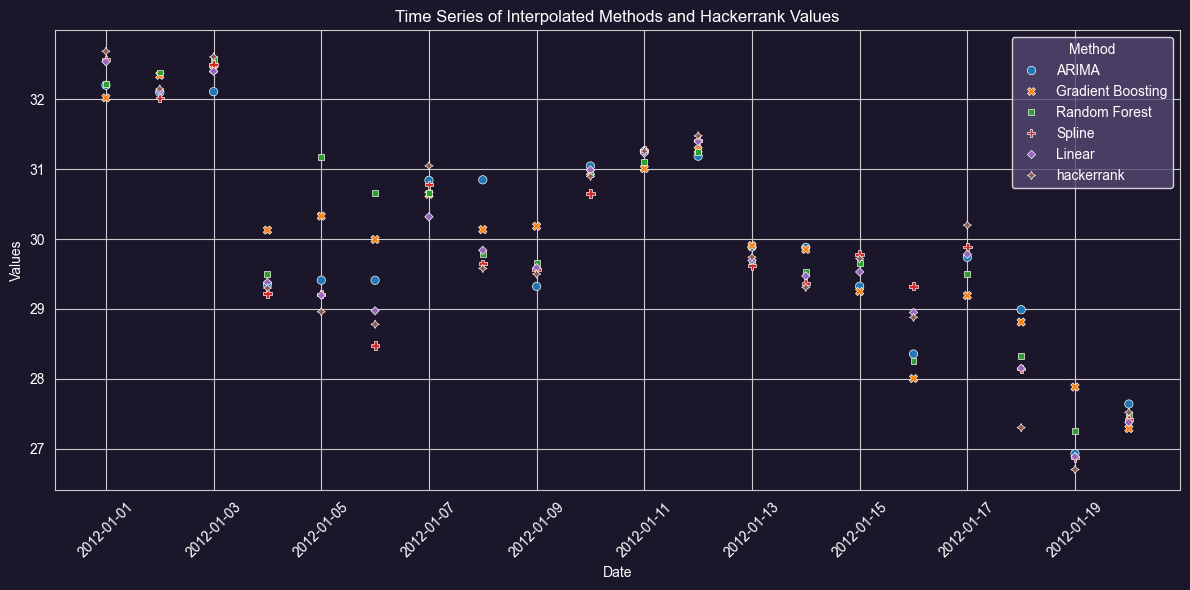

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'result' DataFrame is pre-loaded and contains multiple interpolation methods columns
# Generate a date range based on the number of rows assuming daily data starting from a specific date
date_range = pd.date_range(start='2012-01-01', periods=len(result), freq='D')

# Assign this date range as a new column
result['Date'] = date_range

# Convert the DataFrame from wide to long format for easier plotting with seaborn
result_long = pd.melt(result, id_vars=['Date'], var_name='Method', value_name='Value')

# Create the scatter plot using Seaborn
plt.figure(figsize=(12, 6), facecolor='#1C162B')  # Set the figure size and background color
ax = sns.scatterplot(data=result_long, x='Date', y='Value', hue='Method', style='Method', markers=True)

# Set the axes background color
ax.set_facecolor('#1C162B')

# Update text color to white for better readability against dark background
plt.title('Time Series of Interpolated Methods and Hackerrank Values', color='white')
plt.xlabel('Date', color='white')
plt.ylabel('Values', color='white')
plt.xticks(rotation=45, color='white')  # Rotate and color x-axis labels
plt.yticks(color='white')  # Color y-axis labels

# Update legend to have white text
legend = plt.legend(title='Method', facecolor='#544872', edgecolor='white')
plt.setp(legend.get_texts(), color='white')  # Set the legend text to white
plt.setp(legend.get_title(), color='white')  # Set the legend title to white

plt.tight_layout()  # Adjust subplots to give some padding
plt.show()


In [44]:
import pandas as pd
import plotly.express as px

# Assuming 'result_long' DataFrame is pre-loaded and contains the 'Date', 'Method', and 'Value' columns
# Create the scatter plot using Plotly Express
fig = px.scatter(result_long,
                 x='Date',
                 y='Value',
                 color='Method',  # Color points by interpolation method for clarity
                 title='Time Series of Interpolated Methods and Hackerrank Values',
                 labels={
                     'Date': 'Date',
                     'Value': 'Interpolated/Predicted Values',
                     'Method': 'Interpolation Method'
                 },
                 hover_data=['Method', 'Value'])  # Display method and value on hover

# Update layout for better readability
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Values',
    legend_title='Method',
    xaxis=dict(
        tickangle=-45,
        nticks=20,
        tickformat='%Y-%m-%d'
    ),
    plot_bgcolor='#1C162B',  # Dark purple background for the plotting area
    paper_bgcolor='#1C162B',  # Dark purple background for the entire chart area
    font=dict(  # Change font color to white for better visibility against the dark background
        color="white"
    )
)

# Adjust the legend to not overlap the data


# Show the plot
fig.show()
